### Setup

In [1]:
import seaborn as sns
import pandas as pd
import os
import inspect
import matplotlib.pyplot as plt

In [2]:
workspace = "C:\\Users\\WB451855\OneDrive - WBG\\!infra_needs_data\\\water\\"

In [3]:
outspace = os.path.join(workspace, 'Graphs')
GlobalService = pd.read_csv(os.path.join(workspace, 'GlobalService.csv'))
GlobalExClass = pd.read_csv(os.path.join(workspace, 'GlobalSpending.csv'))
GlobalCap = pd.read_csv(os.path.join(workspace, 'GlobalExistingNewCap.csv'))
RegionalService = pd.read_csv(os.path.join(workspace, 'RegionalService.csv'))
RegionalExClass = pd.read_csv(os.path.join(workspace, 'RegionalSpending.csv'))
RegionalCap = pd.read_csv(os.path.join(workspace, 'RegionalExistingNewCap.csv'))

In [4]:
GlobalService = GlobalService[['Case','PopulationModel','Technology','CapitalCost','Service','UpgradePathway','Cost','%GDP']]
GlobalService = GlobalService.loc[GlobalService['UpgradePathway'] != 'Baseline']
GlobalExClass = GlobalExClass[['Case','PopulationModel','Technology','CapitalCost','ExpenditureClass','UpgradePathway','Cost','%GDP']]
GlobalExClass = GlobalExClass.loc[GlobalExClass['UpgradePathway'] != 'Baseline']
GlobalCap = GlobalCap[['Case','PopulationModel','Technology','CapitalCost','ExpenditureClass','UpgradePathway','NewOld','Cost','%GDP']]
GlobalCap = GlobalCap.loc[GlobalCap['UpgradePathway'] != 'Baseline']

RegionalService = RegionalService[['Case','PopulationModel','Technology','CapitalCost','Region','Service','UpgradePathway','Cost','%GDP']]
RegionalService = RegionalService.loc[RegionalService['UpgradePathway'] != 'Baseline']
RegionalExClass = RegionalExClass[['Case','PopulationModel','Technology','CapitalCost','Region','ExpenditureClass','UpgradePathway','Cost','%GDP']]
RegionalExClass = RegionalExClass.loc[RegionalExClass['UpgradePathway'] != 'Baseline']
RegionalCap = RegionalCap[['Case','PopulationModel','Technology','CapitalCost','ExpenditureClass','NewOld','Region','UpgradePathway','Cost','%GDP']]
RegionalCap = RegionalCap.loc[RegionalCap['UpgradePathway'] != 'Baseline']

In [5]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

### Dictionaries for labelling / sorting

In [6]:
legend = {'PopulationModel': 'SSP Choice', 
     'CapitalCost': 'Capital Cost Level',
    'Technology' : 'Technology',
    'UpgradePathway': 'Strategy',
         'NewOld':'CapEx by \nAsset Class'}
sort_upgr = {'Basic WASH': 1,
            'Direct' : 2,
            'Baseline' : 3,
            'Indirect' :4
            }
sort_serv = {'BasicWater':1,
                'BasicSanitation':2,
                'Hygiene':3,
                'SafeWater':4,
                'SafeSanitation':5,
                'EndingOD':6,
                'Total':7
            }
sort_spen = {'Capital':1,
            'Maintenance':2,
            'Operations':3,
            'Total':4
            }
sort_regi = {'LAC': 1,
            'SSA':2,
            'MNA':3,
            'ECA':4,
            'SAR':5,
            'EAP':6
            }
regi_dict = {"EAP":"East Asia\nand Pacific",
            "ECA":"Europe and\nCentral Asia",
            "LAC":"Latin America\nand Caribbean",
            "MNA":"Middle-East\nand North Africa",
            "SAS":"South Asia",
            "SAR":"South Asia", 
            "SSA":"Sub-Saharan\nAfrica",
            "YHI":"High income",
            "World":"All Developing\nCountries"
           }

In [11]:
GlobalExClass.sample(5)

,Case,PopulationModel,Technology,CapitalCost,ExpenditureClass,UpgradePathway,Cost,%GDP
100,Case 11,SSP3,Low,High,Capital,Indirect,202231.5515,0.560946
161,Case 12,SSP3,High,High,Operations,Basic WASH,144332.8254,0.400348
73,Case 8,SSP2,High,High,Capital,Direct,212296.9058,0.578620
17,Case 6,SSP3,High,Low,Operations,Direct,202374.6928,0.561343
149,Case 12,SSP3,High,High,Capital,Basic WASH,140525.4847,0.389787


# Spending data in % GDP

Summary statistics of all the scenarios for infrastructure spending in new capital between 2015 and 2030 as % of GDP (annual average)

In [8]:
GlobalExClass.loc[(GlobalExClass.ExpenditureClass=="Capital"),"%GDP"].describe()

count    36.000000
mean      0.480706
std       0.099303
min       0.323674
25%       0.377512
50%       0.508530
75%       0.550434
max       0.636624
Name: %GDP, dtype: float64

Description of the minimum and maximum capital spending scenario

In [14]:
min_cap_spending = GlobalExClass.loc[(GlobalExClass.ExpenditureClass=="Capital"),"%GDP"].min()

GlobalExClass.loc[(GlobalExClass.ExpenditureClass=="Capital")&(GlobalExClass["%GDP"]==min_cap_spending),:]

,Case,PopulationModel,Technology,CapitalCost,ExpenditureClass,UpgradePathway,Cost,%GDP
168,Case 1,SSP2,Low,Low,Capital,Basic WASH,118756.7879,0.323674


In [15]:
max_cap_spending = GlobalExClass.loc[(GlobalExClass.ExpenditureClass=="Capital"),"%GDP"].max()

GlobalExClass.loc[(GlobalExClass.ExpenditureClass=="Capital")&(GlobalExClass["%GDP"]==max_cap_spending),:]

,Case,PopulationModel,Technology,CapitalCost,ExpenditureClass,UpgradePathway,Cost,%GDP
99,Case 10,SSP4,High,High,Capital,Indirect,231957.2465,0.636624


All spending (capital + maintenance) for basic WASH

In [9]:
GlobalExClass.loc[(GlobalExClass.ExpenditureClass=="Total"),"%GDP"].describe()

count    36.000000
mean      1.108149
std       0.210211
min       0.774765
25%       0.876579
50%       1.167682
75%       1.275896
max       1.398873
Name: %GDP, dtype: float64

Maintenance only

In [10]:
GlobalExClass.loc[GlobalExClass.ExpenditureClass=="Maintenance","%GDP"].describe()

count    36.000000
mean      0.144718
std       0.036075
min       0.088594
25%       0.105769
50%       0.156102
75%       0.176052
max       0.190093
Name: %GDP, dtype: float64

###  "preferred scenario" 

It is selected based on the analysis in the water chapter

In [18]:
best_scenario = GlobalExClass

select = (best_scenario.PopulationModel=="SSP2")&(best_scenario.Technology=="High")&(best_scenario.CapitalCost=="Low")&(best_scenario.UpgradePathway=="Indirect")

best_scenario.loc[select,["ExpenditureClass","%GDP","Cost"]]

,ExpenditureClass,%GDP,Cost
25,Capital,0.546930,200669.75450
31,Maintenance,0.182214,66854.64959
37,Operations,0.555596,203849.32150
43,Total,1.284739,471373.72560


### Preferred scenario disaggregated by region

In [20]:
best_scenario = RegionalExClass

select = (best_scenario.PopulationModel=="SSP2")&(best_scenario.Technology=="High")&(best_scenario.CapitalCost=="Low")&(best_scenario.UpgradePathway=="Indirect")

best_scenario = best_scenario.loc[select,:]

In [22]:
best_scenario.set_index(["Region","ExpenditureClass"])["%GDP"].unstack("ExpenditureClass")

ExpenditureClass,Capital,Maintenance,Operations,Total
Region,,,,
EAP,0.332030,0.104934,0.353126,0.790090
ECA,0.438230,0.131379,0.470919,1.040529
LAC,0.482783,0.156521,0.661084,1.300388
MNA,0.904138,0.296082,0.764598,1.964819
SAR,0.808080,0.292625,0.658159,1.758864
SSA,1.572105,0.569253,1.345373,3.486731
World,0.546930,0.182214,0.555596,1.284739


# Analysis that went into the water chapter

### Global: Service

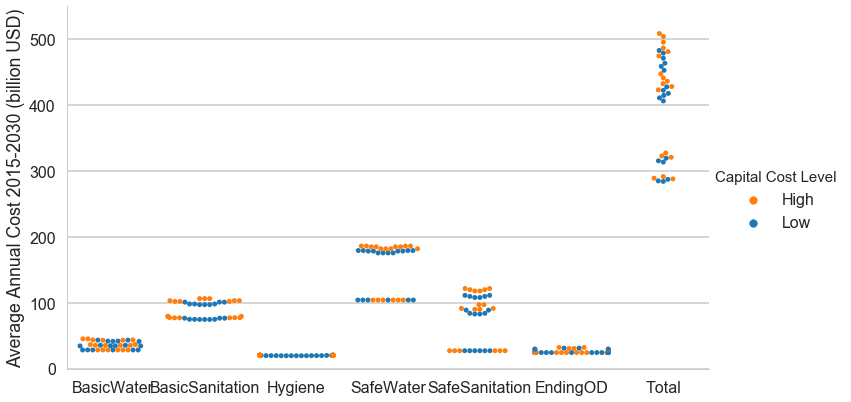

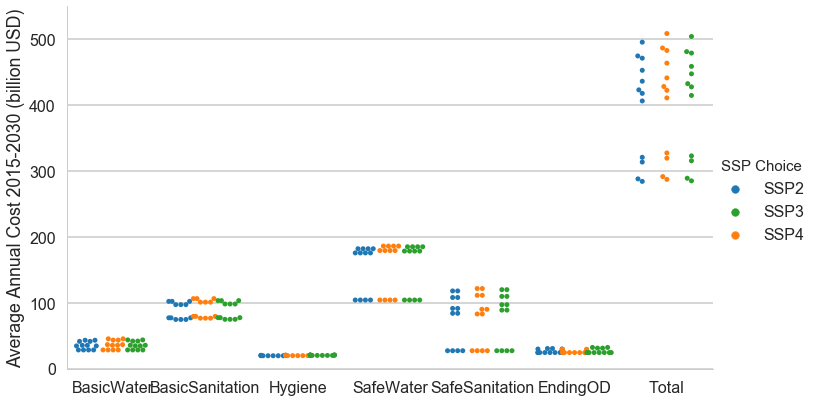

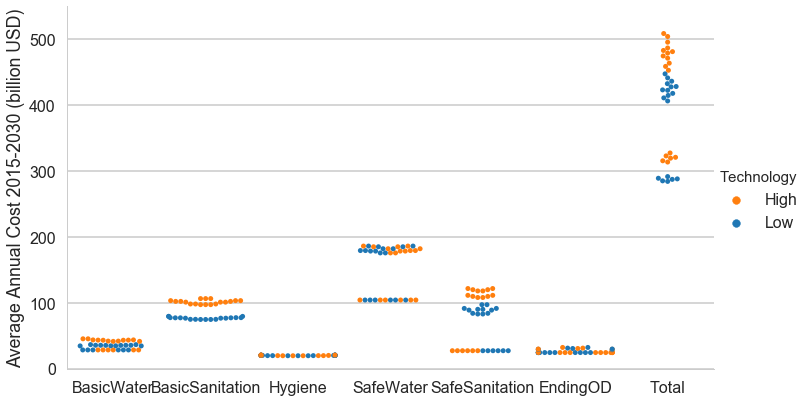

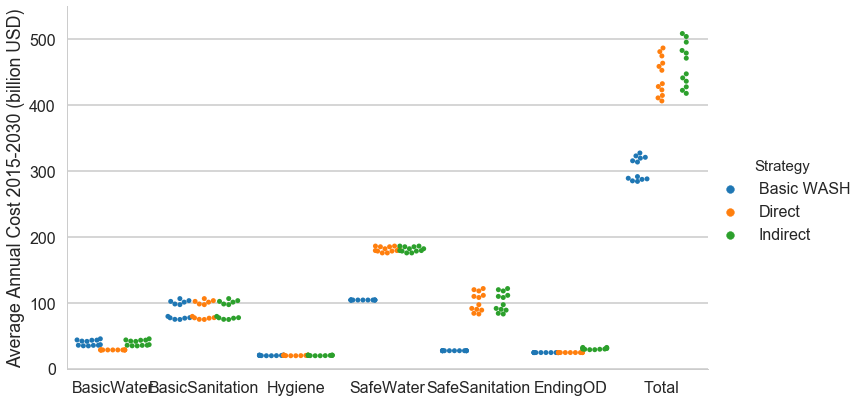

In [41]:
%matplotlib inline

plot = GlobalService.copy()
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_serv'] = plot['Service'].map(sort_serv)
plot = plot.sort_values(by = ['sort_serv','sort_upgr'],ascending = True)
plot['Cost'] = plot['Cost'] / 1000

for color in ['CapitalCost','PopulationModel','Technology','UpgradePathway']:
    
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False
    
    g = sns.factorplot(x='Service',y='Cost', hue = color, data=plot, kind="swarm",size=6, aspect=1.7, dodge = dodge, legend=False)

    g.set_axis_labels("", "Average Annual Cost 2015-{} (billion USD)".format(2030))
    g.add_legend(title = legend[color])
    g = g.set(ylim = (0,550))
    plt.savefig(os.path.join(outspace,"Global_service_%s.pdf" % (color)),ddpi = 300, bbox_inches = 'tight')


### Global: Spending

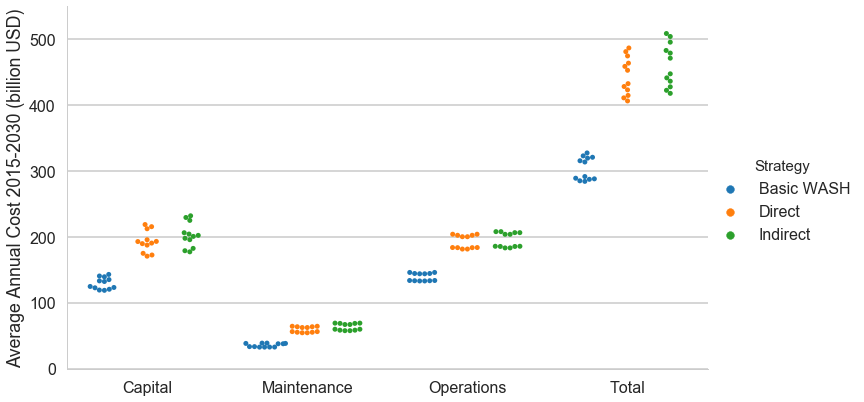

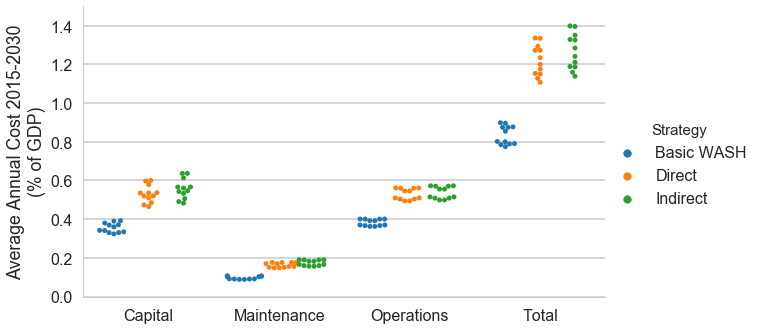

In [42]:
%matplotlib inline

plot = GlobalExClass.copy()
plot['Cost'] = plot['Cost'] / 1000
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_spen'] = plot['ExpenditureClass'].map(sort_spen)
plot = plot.sort_values(by = ['sort_spen','sort_upgr'],ascending = True)

for color in ['UpgradePathway']:
    
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False
    
    g = sns.factorplot(x='ExpenditureClass',y='Cost', hue = color, data=plot, kind="swarm",size=6, aspect=1.7, dodge = dodge, legend=False)

    g.set_axis_labels("", "Average Annual Cost 2015-{} (billion USD)".format(2030))
    g.add_legend(title = legend[color])
    g = g.set(ylim = (0,550))
    plt.savefig(os.path.join(outspace,"Global_spendtype_cost_%s.pdf" % (color)),ddpi = 300, bbox_inches = 'tight')

for color in ['UpgradePathway']:
    
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False
    
    g = sns.factorplot(x='ExpenditureClass',y='%GDP', hue = color, data=plot, kind="swarm",size=5, aspect=1.7, dodge = dodge, legend=False)

    g.set_axis_labels("", "Average Annual Cost 2015-{}\n(% of GDP)".format(2030))
    g.add_legend(title = legend[color])
    g = g.set(ylim = (0,1.5))
    plt.savefig(os.path.join(outspace,"Global_spendtype_GDP_%s.pdf" % (color)),ddpi = 300, bbox_inches = 'tight')
    plt.savefig(os.path.join(outspace,"Global_spendtype_GDP_%s.png" % (color)),ddpi = 300, bbox_inches = 'tight')

### Global: Capital

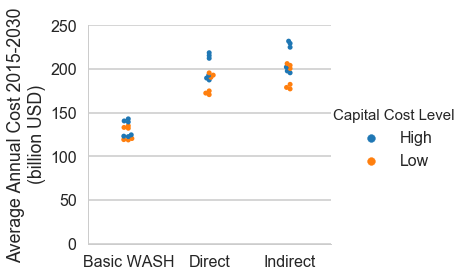

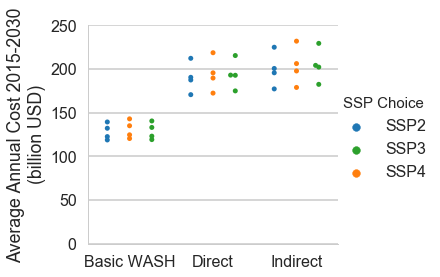

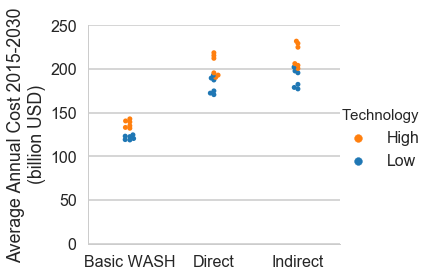

In [43]:
%matplotlib inline

plot = GlobalExClass.copy()
plot['Cost'] = plot['Cost'] / 1000
plot = plot.loc[plot['ExpenditureClass'] == 'Capital']
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_spen'] = plot['ExpenditureClass'].map(sort_spen)
plot = plot.sort_values(by = ['sort_spen','sort_upgr'],ascending = True)

for color in ['CapitalCost','PopulationModel','Technology']:
    
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False
    
    g = sns.factorplot(x='UpgradePathway',y='Cost', hue = color, data=plot, kind="swarm",size=4, aspect=1.2, dodge = dodge, legend=False)

    g.set_axis_labels("", "Average Annual Cost 2015-{}\n(billion USD)".format(2030))
    g.add_legend(title = legend[color])
    g = g.set(ylim = (0,250))
    plt.savefig(os.path.join(outspace,"Global_capital_pathway_%s.pdf" % (color)),ddpi = 300, bbox_inches = 'tight')
    plt.savefig(os.path.join(outspace,"Global_capital_pathway_%s.png" % (color)),ddpi = 300, bbox_inches = 'tight')

In [40]:
%matplotlib inline

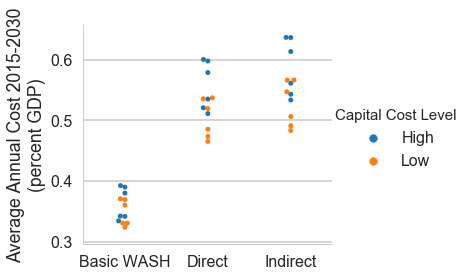

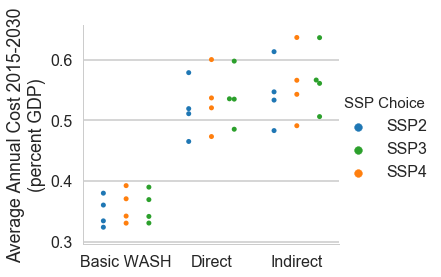

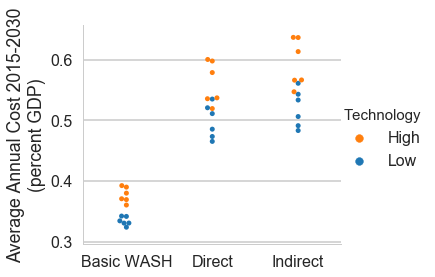

In [42]:
plot = GlobalExClass.copy()
plot['Cost'] = plot['Cost'] / 1000
plot = plot.loc[plot['ExpenditureClass'] == 'Capital']
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_spen'] = plot['ExpenditureClass'].map(sort_spen)
plot = plot.sort_values(by = ['sort_spen','sort_upgr'],ascending = True)

for color in ['CapitalCost','PopulationModel','Technology']:
    
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False
    
    g = sns.factorplot(x='UpgradePathway',y='%GDP', hue = color, data=plot, kind="swarm",size=4, aspect=1.2, dodge = dodge, legend=False)

    g.set_axis_labels("", "Average Annual Cost 2015-2030\n(percent GDP)".format(2030))
    g.add_legend(title = legend[color])
    #g = g.set(ylim = (0,250))
    plt.savefig(os.path.join(outspace,"Global_capital_pathway_GDP_%s.pdf" % (color)),ddpi = 300, bbox_inches = 'tight')
    plt.savefig(os.path.join(outspace,"Global_capital_pathway_GDP_%s.png" % (color)),ddpi = 300, bbox_inches = 'tight')

In [44]:
### Global: Total

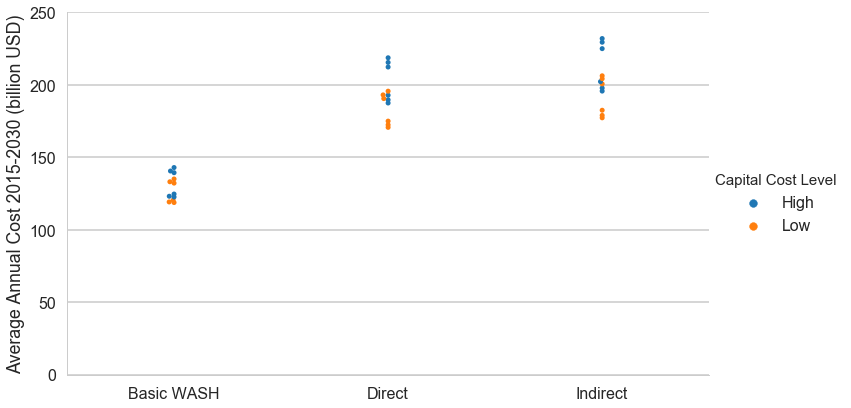

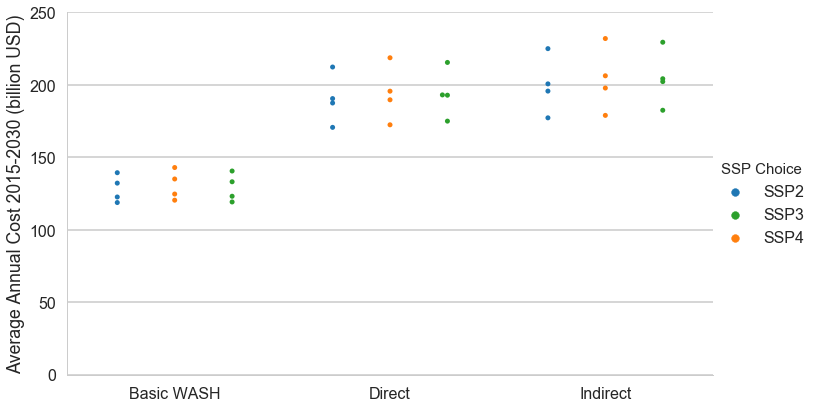

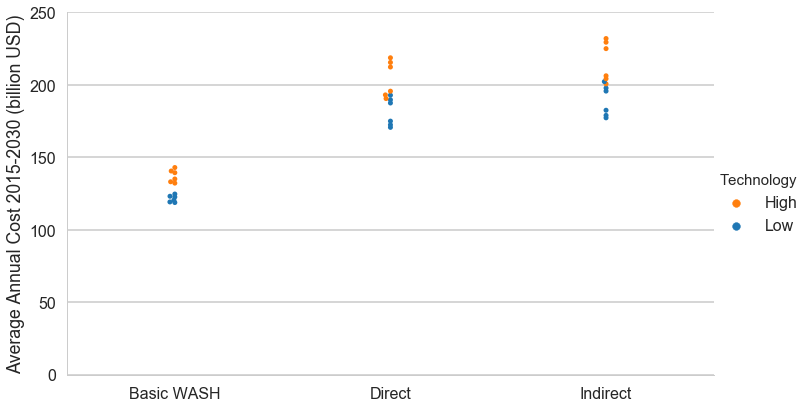

In [45]:
%matplotlib inline

plot = GlobalExClass.copy()
plot['Cost'] = plot['Cost'] / 1000
plot = plot.loc[plot['ExpenditureClass'] == 'Capital']
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_spen'] = plot['ExpenditureClass'].map(sort_spen)
plot = plot.sort_values(by = ['sort_spen','sort_upgr'],ascending = True)

for color in ['CapitalCost','PopulationModel','Technology']:
    
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False
    
    g = sns.factorplot(x='UpgradePathway',y='Cost', hue = color, data=plot, kind="swarm",size=6, aspect=1.7, dodge = dodge, legend=False)

    g.set_axis_labels("", "Average Annual Cost 2015-{} (billion USD)".format(2030))
    g.add_legend(title = legend[color])
    g = g.set(ylim = (0,250))
    plt.savefig(os.path.join(outspace,"Global_capital_pathway_%s.pdf" % (color)),ddpi = 300, bbox_inches = 'tight')

### Regional: Capital Expenditure

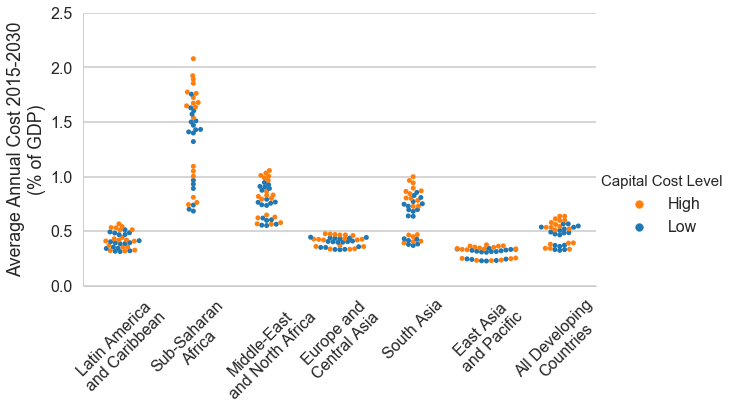

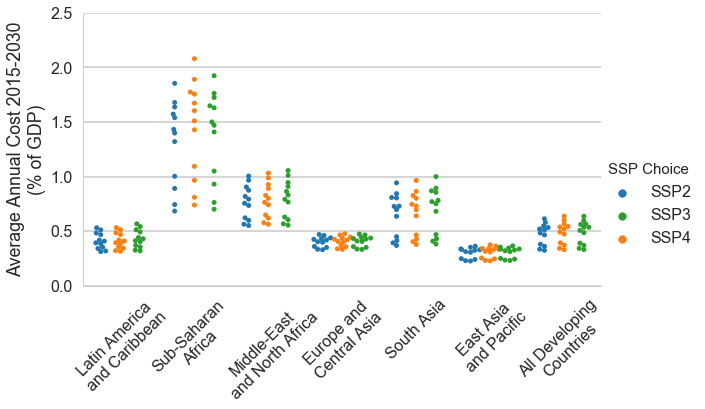

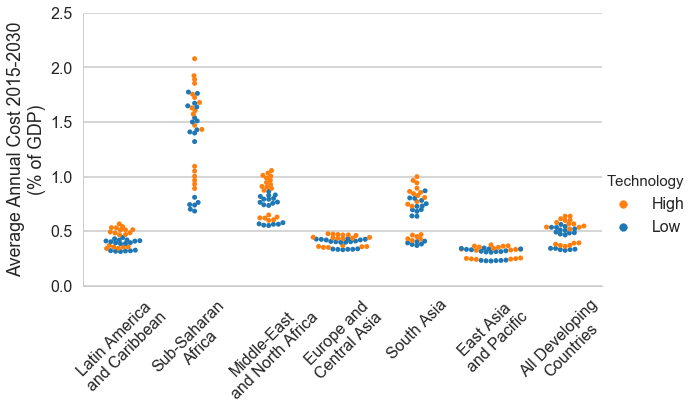

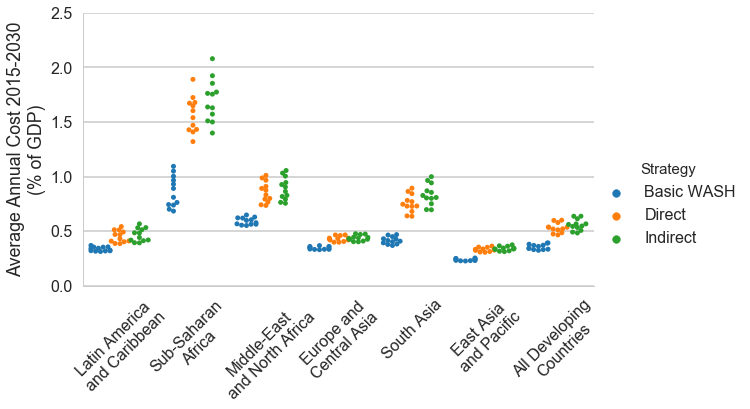

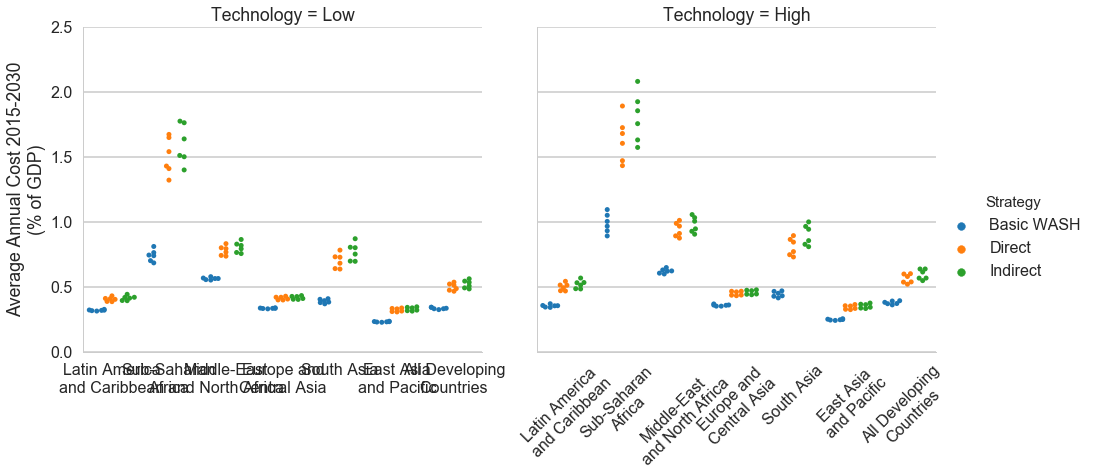

In [46]:
%matplotlib inline

plot = RegionalExClass.copy()
plot = plot.loc[plot['ExpenditureClass'] == 'Capital']
#plot = plot.loc[plot['Region']!='World']
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_regi'] = plot['Region'].map(sort_regi)
plot['Region'] = plot.Region.replace(regi_dict)
plot = plot.sort_values(by = ['sort_regi','sort_upgr'],ascending = True)

for color in ['CapitalCost','PopulationModel','Technology','UpgradePathway']:
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False

    h = sns.factorplot(x='Region',y='%GDP', hue = color, data=plot, kind="swarm",size=5, aspect=1.7, dodge = dodge, legend=False)

    h.set_axis_labels("", "Average Annual Cost 2015-{}\n(% of GDP)".format(2030))
    h.add_legend(title = legend[color])
    h = h.set(ylim = (0,2.5))
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(outspace,"Regional_capital_GDP_%s.pdf" % color),ddpi = 300, bbox_inches = 'tight')
    plt.savefig(os.path.join(outspace,"Regional_capital_GDP_%s.png" % color),ddpi = 300, bbox_inches = 'tight')


color = 'UpgradePathway'
h = sns.factorplot(x='Region',y='%GDP', hue = color, col = 'Technology', data=plot, kind="swarm",size=6, aspect=1.1, dodge = dodge, legend=False)
h.set_axis_labels("", "Average Annual Cost 2015-{}\n(% of GDP)".format(2030))
h.add_legend(title = legend[color])
h = h.set(ylim = (0,2.5))
plt.xticks(rotation=45)
plt.savefig(os.path.join(outspace,"Regional_capital_GDP_%s_%s.pdf" % (color, 'Technology')),ddpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(outspace,"Regional_capital_GDP_%s_%s.png" % (color, 'Technology')),ddpi = 300, bbox_inches = 'tight')


### Regional: All Expenditure

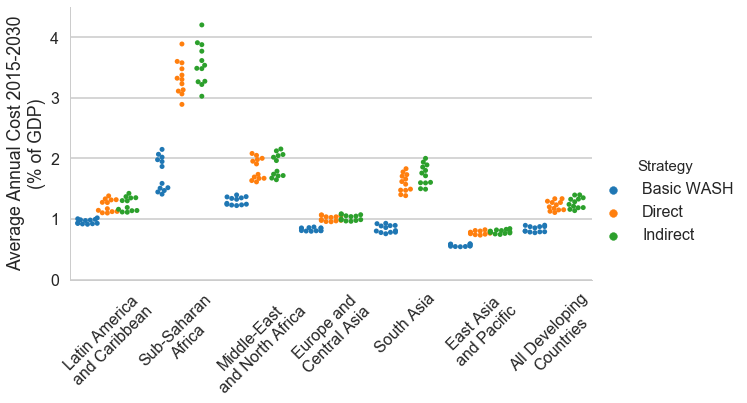

In [59]:
%matplotlib inline

plot = RegionalExClass.copy()
plot = plot.loc[plot['ExpenditureClass'] == 'Total']
#plot = plot.loc[plot['Region']!='World']
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_regi'] = plot['Region'].map(sort_regi)
plot['Region'] = plot.Region.replace(regi_dict)
plot = plot.sort_values(by = ['sort_regi','sort_upgr'],ascending = True)

for color in ['UpgradePathway']:
    if color == 'UpgradePathway' or color == 'PopulationModel':     
        dodge = True
    else: 
        dodge = False

    h = sns.factorplot(x='Region',y='%GDP', hue = color, data=plot, kind="swarm",size=5, aspect=1.7, dodge = dodge, legend=False)

    h.set_axis_labels("", "Average Annual Cost 2015-{}\n(% of GDP)".format(2030))
    h.add_legend(title = legend[color])
    h = h.set(ylim = (0,4.5))
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(outspace,"Regional_total_GDP_%s.pdf" % color),ddpi = 300, bbox_inches = 'tight')
    plt.savefig(os.path.join(outspace,"Regional_total_GDP_%s.png" % color),ddpi = 300, bbox_inches = 'tight')

### Statistics used in the text

In [48]:
temp = GlobalCap.copy()
temp['Cost'] = temp['Cost'] / 1000
temp['Cost'] = temp['Cost'].round(0)
temp = temp.loc[temp['ExpenditureClass'] == 'Capital']
temp_basic = temp.loc[temp['UpgradePathway'] == 'Basic WASH']
temp_SDG = temp.loc[temp['UpgradePathway'] != 'Basic WASH']
temp_basic_exp = temp_basic.loc[temp_basic['NewOld'] == 'New']
temp_SDG_exp = temp_SDG.loc[temp_SDG['NewOld'] == 'New']
temp_basic = temp_basic.loc[temp_basic['NewOld'] == 'Total']
temp_SDG = temp_SDG.loc[temp_SDG['NewOld'] == 'Total']
tempold = temp.loc[temp['NewOld'] == 'Old']

In [49]:
print('-------------')
print('EXPANSION CAPITAL COSTS')
print('Range Basic WASH  = %d - %d' % (temp_basic_exp['Cost'].min(), temp_basic_exp['Cost'].max() ))
print('Range SDG  = %d - %d' % (temp_SDG_exp['Cost'].min(), temp_SDG_exp['Cost'].max()))
print('Range Basic WASH GDP = %f - %f' % (temp_basic_exp['%GDP'].min(), temp_basic_exp['%GDP'].max()))
print('Range SDG GDP = %f - %f' % (temp_SDG_exp['%GDP'].min(), temp_SDG_exp['%GDP'].max()))
print('-------------')
print('EXISTING CAPITAL COSTS')
print('Existing Capital Costs = %d, %f of GDP' % (tempold['Cost'].min(),tempold['%GDP'].min()))
print('-------------')
print('TOTAL CAPITAL COSTS')
print('Range Basic WASH  = %d - %d' % (temp_basic['Cost'].min(), temp_basic['Cost'].max()))
print('Range SDG  = %d - %d' % (temp_SDG['Cost'].min(), temp_SDG['Cost'].max()))
print('Range Basic WASH GDP = %f - %f' % (temp_basic['%GDP'].min(), temp_basic['%GDP'].max()))
print('Range SDG GDP = %f - %f' % (temp_SDG['%GDP'].min(), temp_SDG['%GDP'].max()))
print('-------------')

-------------
EXPANSION CAPITAL COSTS
Range Basic WASH  = 15 - 40
Range SDG  = 67 - 129
Range Basic WASH GDP = 0.042000 - 0.108000
Range SDG GDP = 0.183000 - 0.353000
-------------
EXISTING CAPITAL COSTS
Existing Capital Costs = 103, 0.282000 of GDP
-------------
TOTAL CAPITAL COSTS
Range Basic WASH  = 119 - 143
Range SDG  = 171 - 232
Range Basic WASH GDP = 0.324000 - 0.392000
Range SDG GDP = 0.465000 - 0.637000
-------------


In [50]:
temp = GlobalExClass.copy()
temp = temp.loc[temp['ExpenditureClass'] == 'Capital']
temp = temp.sort_values(by = ['Technology','CapitalCost','UpgradePathway'])
temp = temp.set_index(['Technology','CapitalCost','UpgradePathway'])
mx = temp['Cost'].max(level = ['Technology','CapitalCost','UpgradePathway']) 
mn = temp['Cost'].min(level = ['Technology','CapitalCost','UpgradePathway'])
rng = ((mx - mn) / mn)
print('Max impact on capital costs of SSP choice: %f percent' % (max(rng) * 100))

Max impact on capital costs of SSP choice: 3.343737 percent


In [51]:
temp = RegionalExClass.copy()
temp = temp.loc[temp['ExpenditureClass'] == 'Capital']
temp = temp.loc[temp['Region'] == 'SSA']
temp['Cost'] = temp['Cost'] / 1000
temp['Cost'] = temp['Cost'].round(0)
temp1 = temp.loc[temp['UpgradePathway'] == 'Basic WASH']
print('AFR Capital cost, basic WASH, range: %d - %d, or %f - %f of GDP' % ( temp1['Cost'].min(), temp1['Cost'].max(), temp1['%GDP'].min(), temp1['%GDP'].max()))
temp2 = temp.loc[temp['UpgradePathway'] != 'Basic WASH']
print('AFR Capital cost, 6.1 and 6.2, range: %d - %d, or %f - %f of GDP' % ( temp2['Cost'].min(), temp2['Cost'].max(), temp2['%GDP'].min(), temp2['%GDP'].max()))


AFR Capital cost, basic WASH, range: 17 - 27, or 0.683458 - 1.093560 of GDP
AFR Capital cost, 6.1 and 6.2, range: 33 - 51, or 1.320445 - 2.080157 of GDP


In [52]:
temp = RegionalExClass.copy()
temp = temp.loc[temp['ExpenditureClass'] == 'Capital']
temp = temp.sort_values(by = ['Region','Technology','CapitalCost','UpgradePathway'])
temp = temp.set_index(['Region','Technology','CapitalCost','UpgradePathway'])
mx = temp['Cost'].max(level = ['Region','Technology','CapitalCost','UpgradePathway']) 
mn = temp['Cost'].min(level = ['Region','Technology','CapitalCost','UpgradePathway'])
rng = ((mx - mn) / mn) * 100
print('Max swing impact on capital costs of population model, by region:')
rng = rng.round(0)
rng.max(level = ['Region'])

Max swing impact on capital costs of population model, by region:


Region
EAP       5.0
ECA       3.0
LAC       7.0
MNA       5.0
SAR       8.0
SSA      10.0
World     3.0
Name: Cost, dtype: float64

In [53]:
temp = GlobalExClass.copy()
temp = temp.set_index(['PopulationModel','Technology','CapitalCost','UpgradePathway'])
temp_cap = temp.copy()
temp_cap = temp_cap.loc[temp_cap['ExpenditureClass'] == 'Total']
temp_o_m = temp.copy()
temp_o_m = temp_o_m.loc[temp_o_m['ExpenditureClass'] == 'Operations'] + temp_o_m.loc[temp_o_m['ExpenditureClass'] == 'Maintenance']
temp_cap['O&M'] = temp_o_m['Cost']
temp_cap['O&M_share'] = temp_cap['O&M'] / temp_cap['Cost'] * 100
print('Max O&M share: %f - %f' % (temp_cap['O&M_share'].min(), temp_cap['O&M_share'].max()))

Max O&M share: 54.412092 - 58.222924


In [54]:
temp = GlobalExClass.copy()
temp['Cost'] = temp['Cost'] / 1000
temp['Cost'] = temp['Cost'].round(0)
temp = temp.loc[temp['ExpenditureClass'] == 'Total']
tempB = temp.loc[temp['UpgradePathway'] == 'Basic WASH']
tempS = temp.loc[temp['UpgradePathway'] != 'Basic WASH']
print('Range Basic: %d - %d, range SDG: %d - %d' % (tempB['Cost'].min(), tempB['Cost'].max(), tempS['Cost'].min(), tempS['Cost'].max())) 
print('Range Basic: %f - %f, range SDG: %f - %f' % (tempB['%GDP'].min(), tempB['%GDP'].max(), tempS['%GDP'].min(), tempS['%GDP'].max())) 

Range Basic: 284 - 327, range SDG: 406 - 509
Range Basic: 0.774765 - 0.898694, range SDG: 1.107714 - 1.398873


In [55]:
temp = GlobalExClass.copy()
temp['Cost'] = temp['Cost'] / 1000
temp['Cost'] = temp['Cost'].round(0)
temp['%GDP'] = temp['%GDP'].round(2)
tempcap = temp.loc[temp['ExpenditureClass'] == 'Capital']
temp_main = temp.loc[temp['ExpenditureClass'] == 'Maintenance']
temp_ops = temp.loc[temp['ExpenditureClass'] == 'Operations']
temp_main = temp_main.set_index(['Case','PopulationModel','Technology','CapitalCost','UpgradePathway'])
temp_ops = temp_ops.set_index(['Case','PopulationModel','Technology','CapitalCost','UpgradePathway'])
tempOM = temp_main + temp_ops
print('O&M Range: %d - %d' % (tempOM['Cost'].min(), tempOM['Cost'].max()))
print('O&M GDP: %f - %f' % (tempOM['%GDP'].min(), tempOM['%GDP'].max()))
print('Cap Range: %d - %d' % (tempcap['Cost'].min(), tempcap['Cost'].max()))
print('Cap GDP: %f - %f' % (tempcap['%GDP'].min(), tempcap['%GDP'].max()))

O&M Range: 166 - 277
O&M GDP: 0.450000 - 0.760000
Cap Range: 119 - 232
Cap GDP: 0.320000 - 0.640000


### New Graph: Regional Cap existing vs. new

In [56]:
%matplotlib inline

plot = RegionalCap.copy()
plot = plot.loc[plot['ExpenditureClass'] == 'Capital']
plot['NewOld'].loc[plot['NewOld'] == 'Old'] = 'Existing'
plot['sort_upgr'] = plot['UpgradePathway'].map(sort_upgr)
plot['sort_regi'] = plot['Region'].map(sort_regi)
plot['Region'] = plot.Region.replace(regi_dict)
plot['Cost'] = plot['Cost'].astype(float) / 1000
plot = plot.sort_values(by = ['sort_regi','sort_upgr'],ascending = True)
newindex = plot.loc[plot['NewOld'] == 'New'].index
exindex = plot['Cost'].loc[plot['NewOld'] == 'Existing'].drop_duplicates(keep = 'first').index
totalindex = newindex.union(exindex)
plot = plot.loc[totalindex]

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


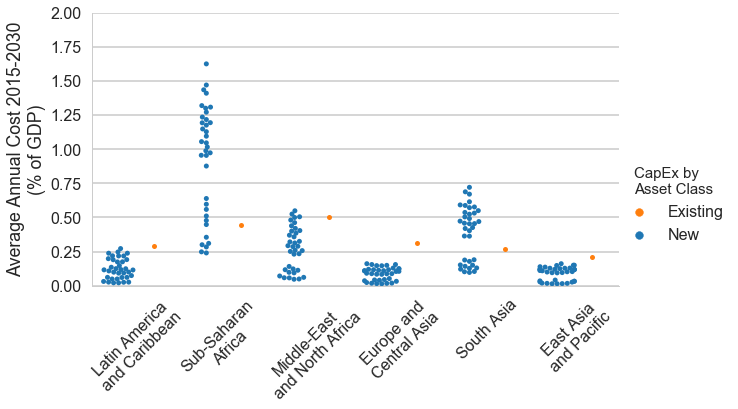

In [58]:
color = 'NewOld'
h = sns.factorplot(x='Region',y='%GDP', hue = color, data=plot, kind="swarm",size=5, aspect=1.7, dodge = dodge, legend=False)
h.set_axis_labels("", "Average Annual Cost 2015-{}\n(% of GDP)".format(2030))
h.add_legend(title = legend[color])
h = h.set(ylim = (0,2))
plt.xticks(rotation=45)
plt.savefig(os.path.join(outspace,"Regional_NewOld_capital_GDP_%s.pdf" % (color)),ddpi = 350, bbox_inches = 'tight')
plt.savefig(os.path.join(outspace,"Regional_NewOld_capital_GDP_%s.png" % (color)),ddpi = 1000, bbox_inches = 'tight')

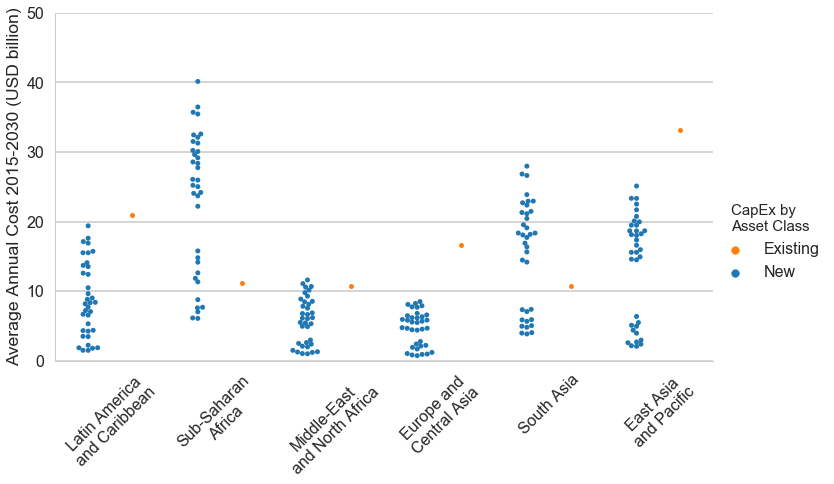

In [128]:
color = 'NewOld'
h = sns.factorplot(x='Region',y='Cost', hue = color, data=plot, kind="swarm",size=6, aspect=1.7, dodge = dodge, legend=False)
h.set_axis_labels("", "Average Annual Cost 2015-{} (USD billion)".format(2030))
h.add_legend(title = legend[color])
h = h.set(ylim = (0,50))
plt.xticks(rotation=45)
plt.savefig(os.path.join(outspace,"Regional_NewOld_capital_Cost_%s.pdf" % (color)),ddpi = 350, bbox_inches = 'tight')
plt.savefig(os.path.join(outspace,"Regional_NewOld_capital_Cost_%s.jpg" % (color)),ddpi = 1000, bbox_inches = 'tight')